Dataset Information

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
- There are 25 variables:

- ID: ID of each client

- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

- SEX: Gender (1=male, 2=female)

- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

- MARRIAGE: Marital status (1=married, 2=single, 3=others)

- AGE: Age in years

- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for 
eight months, 9=payment delay for nine months and above)

- PAY_2: Repayment status in August, 2005 (scale same as above)

- PAY_3: Repayment status in July, 2005 (scale same as above)

- PAY_4: Repayment status in June, 2005 (scale same as above)

- PAY_5: Repayment status in May, 2005 (scale same as above)

- PAY_6: Repayment status in April, 2005 (scale same as above)

- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

- default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv('CreditCard.csv')

In [3]:
dataset.shape

(30000, 25)

In [4]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### This is binary Classification Problem.

In [5]:
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [6]:
# dataset.info()
dataset.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

### In this dataset their is a catch how SEX,EDUCATION,MARRIAGE are integer datatype we will check in further analysis.

In [7]:
dataset.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

## Duplicate Value

In [8]:
dataset[dataset.duplicated()==True]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


### No Duplicate Value in dataset.

In [9]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## Missing Value.

In [11]:
dataset.isnull().sum() 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### In our dataset their is no Missing / NaN Values.

## Data Type

In [12]:
# dataset.info()
dataset.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

## Target Feature Analysis / Dependent Feature Analysis / Output Feature Analysis.

In [13]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### We will lower the case of column name along with rename the column name for better understanding.

In [14]:
dataset.columns = [x.lower() for x in dataset.columns]

In [15]:
dataset.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [16]:
dataset.rename(columns={'default.payment.next.month' : 'default'},inplace=True)
dataset.rename(columns={'pay_0':'pay_sep','pay_2':'pay_aug','pay_3':'pay_july','pay_4':'pay_june','pay_5':'pay_may','pay_6':'pay_apr'},inplace=True)
dataset.rename(columns={'bill_amt1':'bill_amt_sep','bill_amt2':'bill_amt_aug','bill_amt3':'bill_amt_july','bill_amt4':'bill_amt_june','bill_amt5':'bill_amt_may','bill_amt6':'bill_amt_apr'},inplace=True)
dataset.rename(columns={'pay_amt1':'pay_amt_sep','pay_amt2':'pay_amt_aug','pay_amt3':'pay_amt_july','pay_amt4':'pay_amt_june','pay_amt5':'pay_amt_may','pay_amt6':'pay_amt_apr'},inplace=True)

In [17]:
dataset.head()

,id,limit_bal,sex,education,marriage,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### We will drop ID Column which is not require.

In [18]:
dataset.drop('id',axis=1,inplace=True)

In [19]:
dataset.head()

,limit_bal,sex,education,marriage,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [20]:
dataset['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

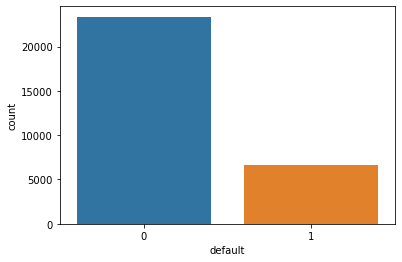

In [21]:
sns.countplot(dataset['default'])

### Data is Highly Imbalanced.

## Independent Feature Analysis.

In [22]:
dataset[['limit_bal']].head()

,limit_bal
0,20000.0
1,120000.0
2,90000.0
3,50000.0
4,50000.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='limit_bal'>

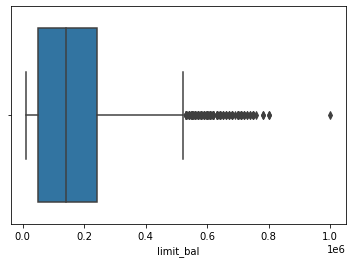

In [23]:
sns.boxplot(dataset['limit_bal'])

### Their are outlier in Limit Balanace

In [24]:
dataset['limit_bal'].dtype

dtype('float64')

### Since datatype is float so we will plot histogram to see the distribution of limit balance feature.

<AxesSubplot:xlabel='limit_bal', ylabel='Count'>

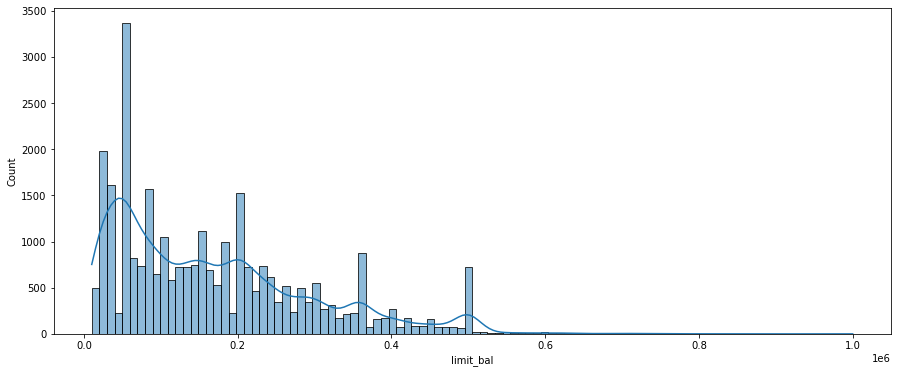

In [25]:
plt.figure(figsize = (15,6))
sns.histplot(dataset['limit_bal'],kde=True,bins=100)

### Maximum amount of given credit is 50,000 then 20,000 then 30,000 an so on.

In [26]:
# We will verify the same
dataset[['limit_bal']].value_counts().head()

limit_bal
50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
dtype: int64

<AxesSubplot:xlabel='default', ylabel='limit_bal'>

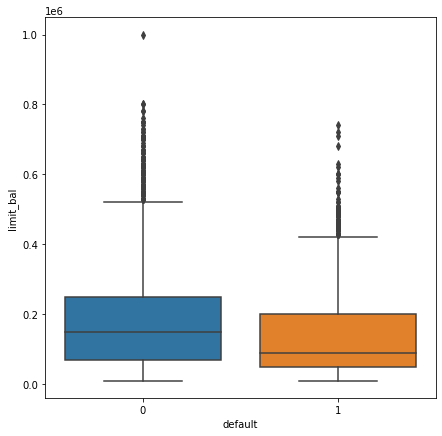

In [27]:
plt.figure(figsize = (7,7))
sns.boxplot(y=dataset['limit_bal'],x =dataset['default'])

### Most of the people with less minimum balance are more likely to fall default.

In [28]:
dataset[['sex']].value_counts()

sex
2      18112
1      11888
dtype: int64

### Male = 1,Female = 2

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

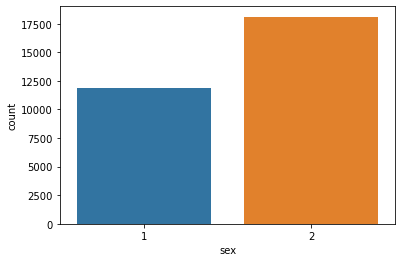

In [29]:
sns.countplot(dataset['sex'])

### From the above observation we see that female uses more credit card than man.

In [30]:
def stack_def(x,y):
    df_grouped = dataset.groupby(x)[y].value_counts(normalize=True).unstack(y)
    df_grouped.plot.bar(stacked=True)
    plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{np.round(float(element * 100),2)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

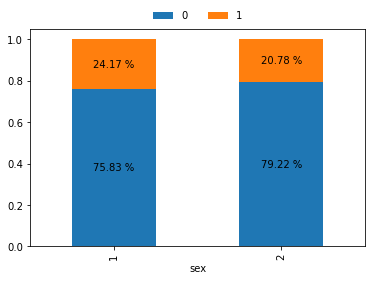

In [31]:
stack_def('sex','default')

### From the above observation we see that Male are more in default than female.

In [32]:
dataset[['education']].value_counts()

education
2            14030
1            10585
3             4917
5              280
4              123
6               51
0               14
dtype: int64

- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

### From the above observation we see that 0 is not defined that the category below to which category and we will merge 0,5,6 into category 4 i.e in others. because they are also unknown category.

In [33]:
dataset['education'] = dataset['education'].replace({0:4,5:4,6:4})

In [34]:
dataset.head()

,limit_bal,sex,education,marriage,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [35]:
dataset['education'].unique()

array([2, 1, 3, 4], dtype=int64)

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

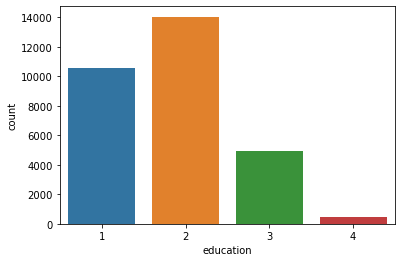

In [36]:
sns.countplot(dataset['education'])

### We see that their are more number of credit card users are from university education.

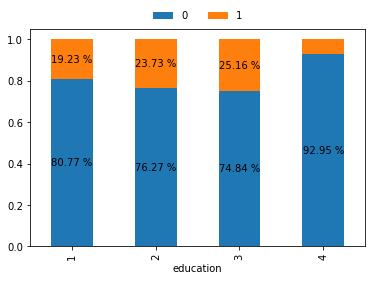

In [37]:
stack_def('education','default') # 1 = Yes Default 0 = No Default

### More number of Defaulter are from High School Education.

In [38]:
dataset[['marriage']].value_counts()

marriage
2           15964
1           13659
3             323
0              54
dtype: int64

 - MARRIAGE: Marital status (1=married, 2=single, 3=others)

### From the above observation we see that 0 is not defined we will merge 0 with 3 i.e. others

In [39]:
dataset['marriage'] = dataset['marriage'].replace({0:3})

In [40]:
dataset['marriage'].unique()

array([1, 2, 3], dtype=int64)

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marriage', ylabel='count'>

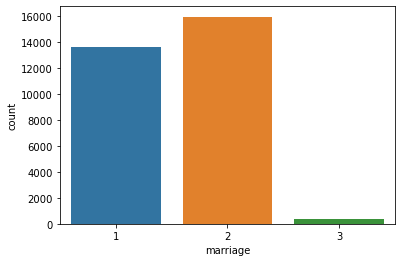

In [41]:
sns.countplot(dataset['marriage'])

### More number of credit card user are Single.

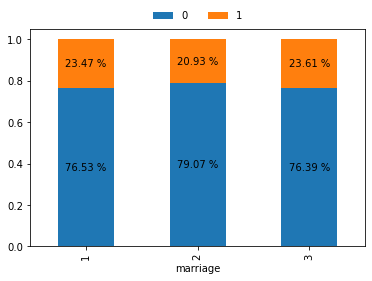

In [42]:
stack_def('marriage','default')

### More Number of defaulter are others.

In [43]:
dataset['age'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=int64)

In [44]:
dataset['age'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: age, dtype: int64

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

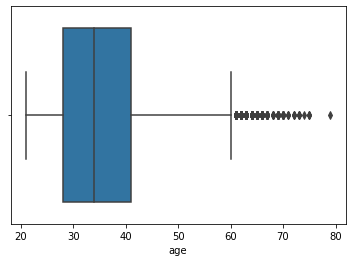

In [45]:
sns.boxplot(dataset['age'])

### Their are outliers in age.

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

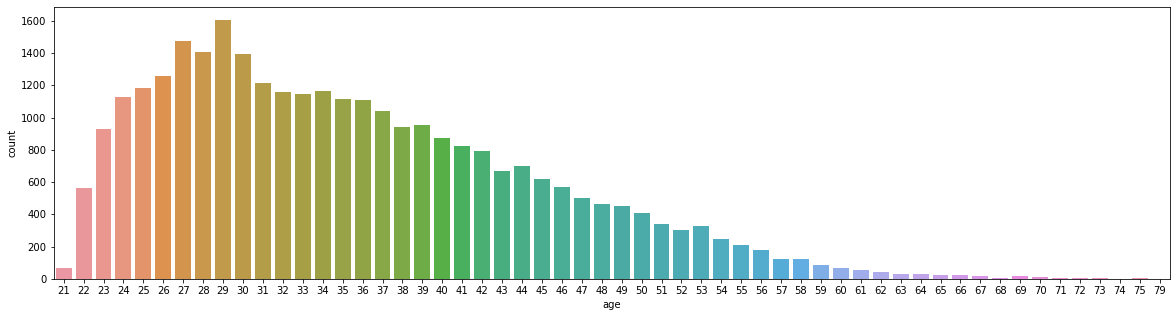

In [46]:
plt.figure(figsize=(20,5))
sns.countplot(dataset['age'])

### We see that more number of credit card holder are of age between 26 to 31.

<AxesSubplot:xlabel='age', ylabel='default'>

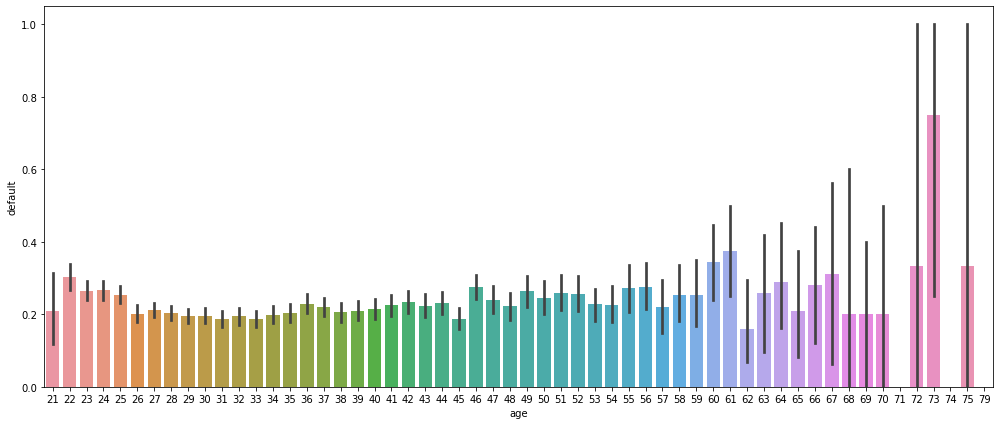

In [47]:
plt.figure(figsize=(17,7))
sns.barplot(x=dataset['age'],y=dataset['default'])

### People from 25 to 39 years old seems to be the only group of people less likely to default.

PAY_0 (pay_sep): Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for 
eight months, 9=payment delay for nine months and above)

In [48]:
dataset['pay_sep'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pay_sep, dtype: int64

### We see that 0 and -2 is not defined in the dataset and -1 is duly payment which means on time so we will replace -1 with 0 and -2 with 0 which means on time payment.

In [49]:
dataset['pay_sep'] = dataset['pay_sep'].replace({-1:0,-2:0})

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_sep', ylabel='count'>

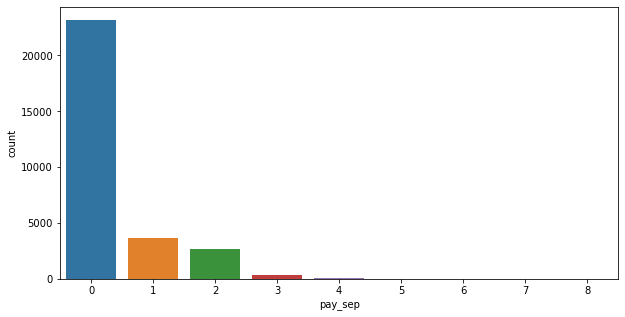

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['pay_sep'])

### =============================

PAY_2 (pay_aug): Repayment status in August, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for 
eight months, 9=payment delay for nine months and above)

In [51]:
dataset['pay_aug'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: pay_aug, dtype: int64

### We see that 0 and -2 is not defined in the dataset and -1 is duly payment which means on time so we will replace -1 with 0 and -2 with 0 which means on time payment.

In [52]:
dataset['pay_aug'] = dataset['pay_aug'].replace({-1:0,-2:0})

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_aug', ylabel='count'>

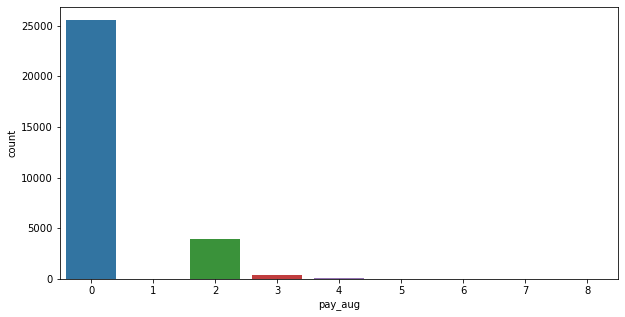

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['pay_aug'])

### =============================

PAY_3(pay_july): Repayment status in July, 2005(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for 
eight months, 9=payment delay for nine months and above)

In [54]:
dataset['pay_july'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: pay_july, dtype: int64

### We see that 0 and -2 is not defined in the dataset and -1 is duly payment which means on time so we will replace -1 with 0 and -2 with 0 which means on time payment.

In [55]:
dataset['pay_july'] = dataset['pay_july'].replace({-1:0,-2:0})

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_july', ylabel='count'>

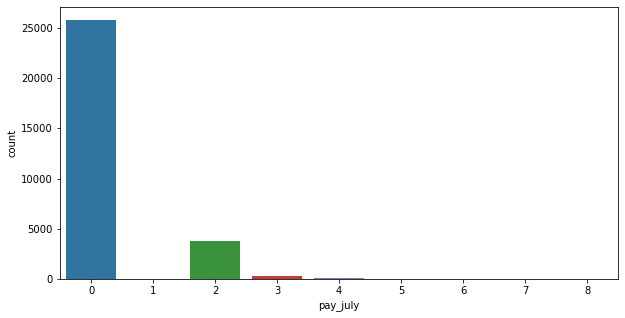

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['pay_july'])

### =============================

PAY_4(pay_june): Repayment status in June, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for 
eight months, 9=payment delay for nine months and above)

In [57]:
dataset['pay_june'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: pay_june, dtype: int64

### We see that 0 and -2 is not defined in the dataset and -1 is duly payment which means on time so we will replace -1 with 0 and -2 with 0 which means on time payment.

In [58]:
dataset['pay_june'] = dataset['pay_june'].replace({-1:0,-2:0})

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_june', ylabel='count'>

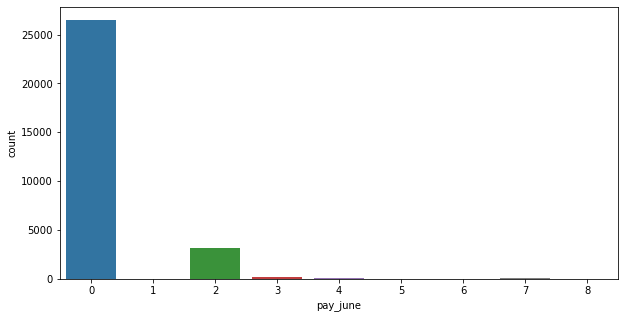

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['pay_june'])

### =============================

PAY_5(pay_may): Repayment status in May, 2005(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for 
eight months, 9=payment delay for nine months and above)

In [60]:
dataset['pay_may'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: pay_may, dtype: int64

### We see that 0 and -2 is not defined in the dataset and -1 is duly payment which means on time so we will replace -1 with 0 and -2 with 0 which means on time payment.

In [61]:
dataset['pay_may'] = dataset['pay_may'].replace({-1:0,-2:0})

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_may', ylabel='count'>

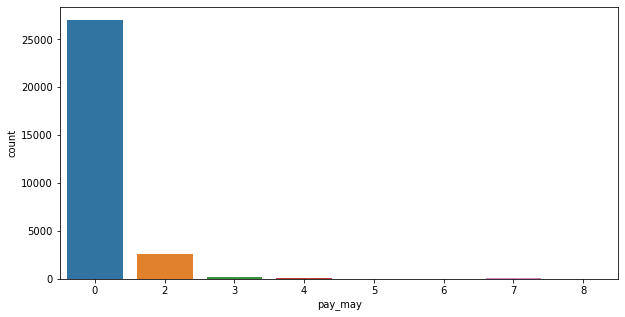

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['pay_may'])

### =============================

PAY_6(pay_apr): Repayment status in April, 2005(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for 
eight months, 9=payment delay for nine months and above)

In [63]:
dataset['pay_apr'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: pay_apr, dtype: int64

### We see that 0 and -2 is not defined in the dataset and -1 is duly payment which means on time so we will replace -1 with 0 and -2 with 0 which means on time payment.

In [64]:
dataset['pay_apr'] = dataset['pay_apr'].replace({-1:0,-2:0})

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_apr', ylabel='count'>

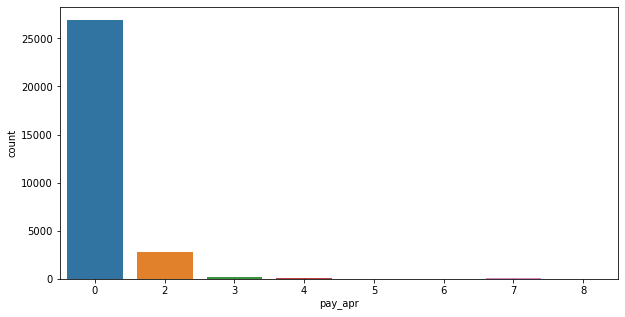

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['pay_apr'])

### =============================

In [66]:
dataset[['bill_amt_sep']].head()

,bill_amt_sep
0,3913.0
1,2682.0
2,29239.0
3,46990.0
4,8617.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_amt_sep'>

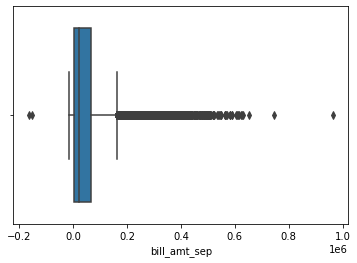

In [67]:
sns.boxplot(dataset['bill_amt_sep'])

### Their are outlier in bill_amt_sep.

<AxesSubplot:xlabel='default', ylabel='bill_amt_sep'>

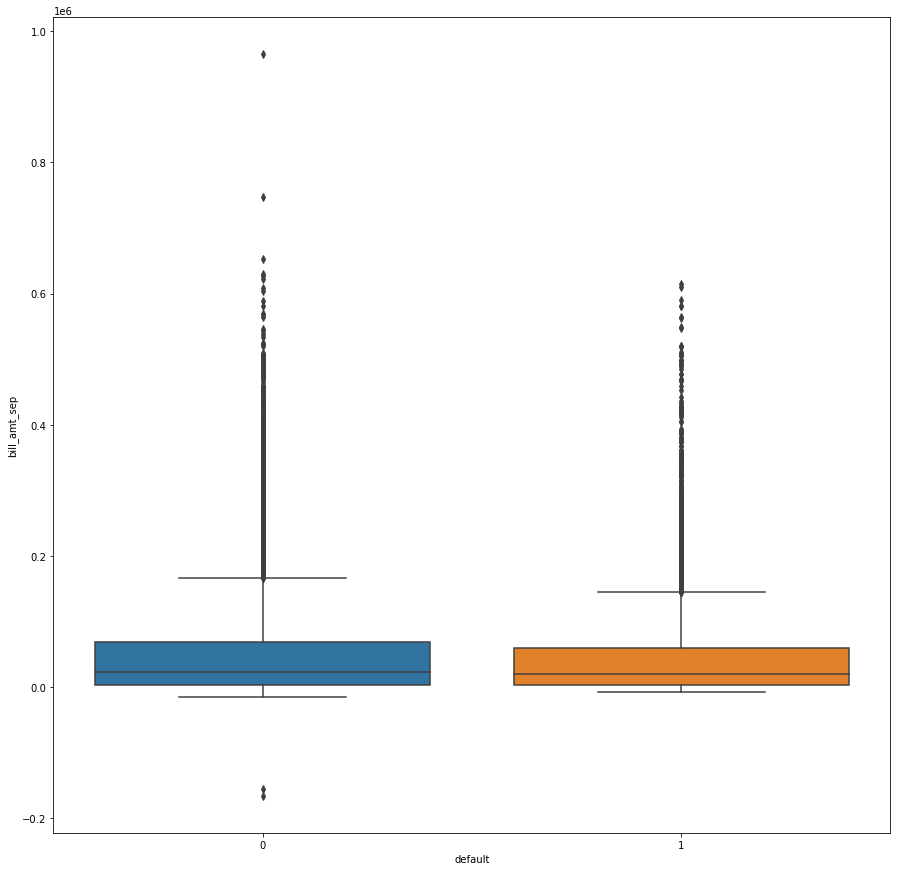

In [68]:
plt.figure(figsize = (15,15))
sns.boxplot(y=dataset['bill_amt_sep'],x =dataset['default'])

### we see that not-default tend to have slight higher bill value.

In [69]:
dataset[['bill_amt_aug']].head()

,bill_amt_aug
0,3102.0
1,1725.0
2,14027.0
3,48233.0
4,5670.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_amt_aug'>

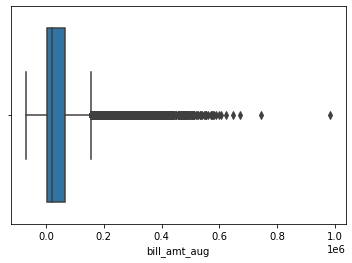

In [70]:
sns.boxplot(dataset['bill_amt_aug'])

### Their are outlier in bill_amt_aug.

<AxesSubplot:xlabel='default', ylabel='bill_amt_aug'>

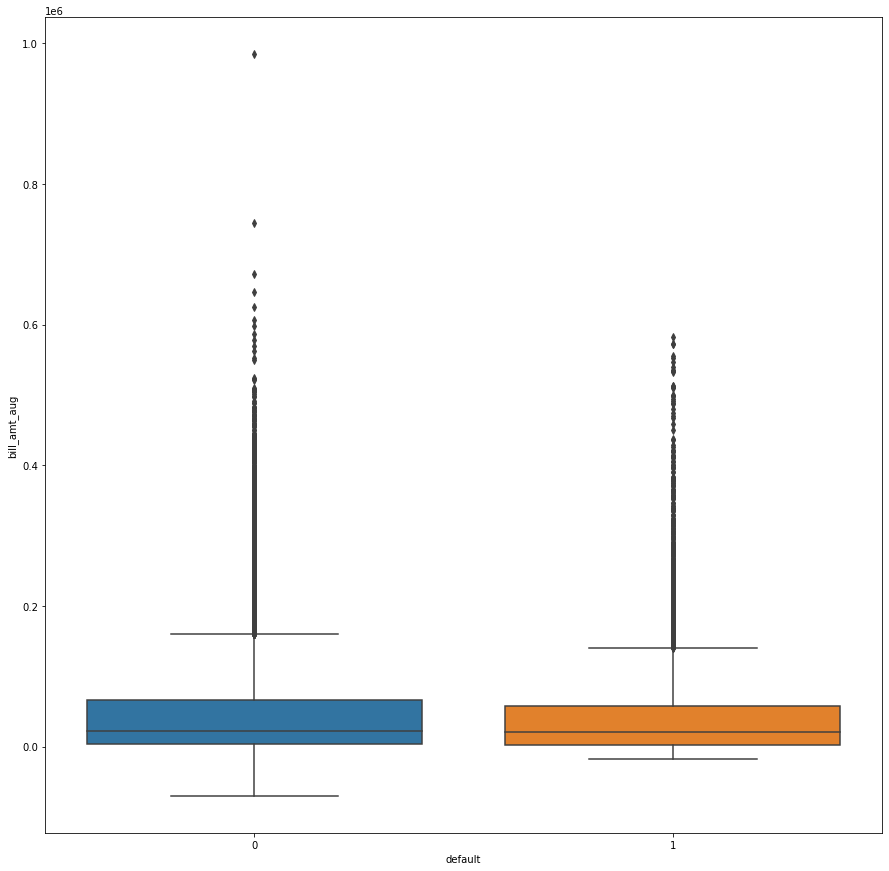

In [71]:
plt.figure(figsize = (15,15))
sns.boxplot(y=dataset['bill_amt_aug'],x =dataset['default'])

### we see that not-default tend to have slight higher bill value.

In [72]:
dataset[['bill_amt_july']].head()

,bill_amt_july
0,689.0
1,2682.0
2,13559.0
3,49291.0
4,35835.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_amt_july'>

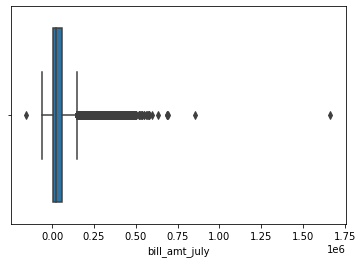

In [73]:
sns.boxplot(dataset['bill_amt_july'])

### Their are outlier in bill_amt_july.

<AxesSubplot:xlabel='default', ylabel='bill_amt_july'>

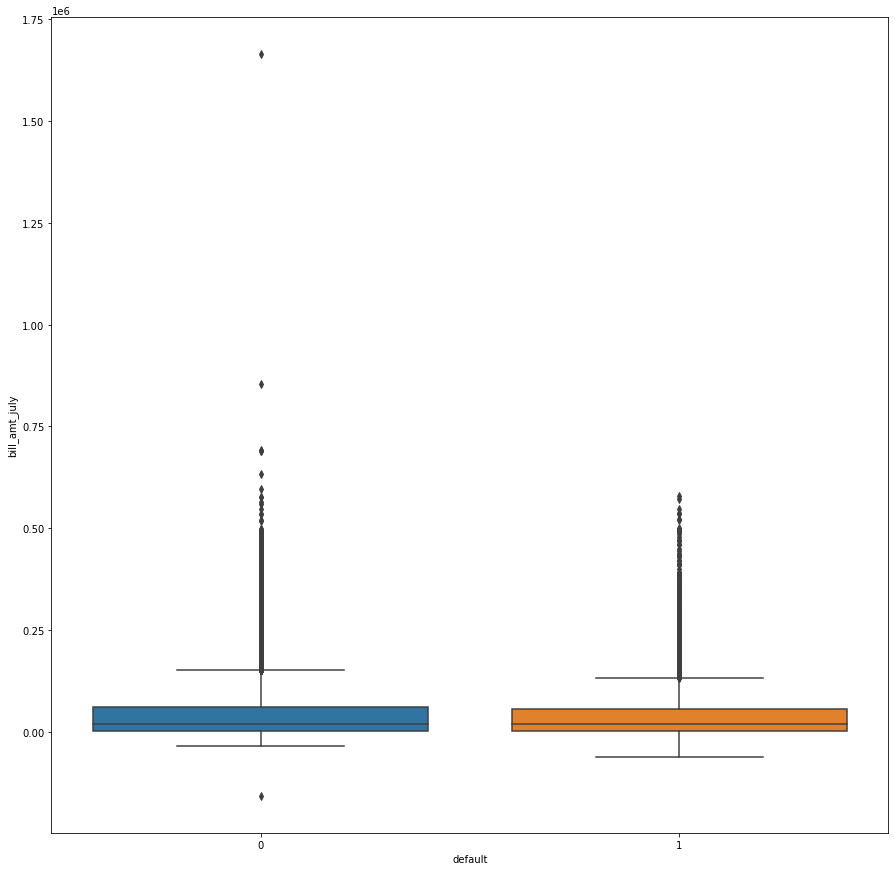

In [74]:
plt.figure(figsize = (15,15))
sns.boxplot(y=dataset['bill_amt_july'],x =dataset['default'])

### we see that not-default tend to have slight higher bill value.

In [75]:
dataset[['bill_amt_june']].head()

,bill_amt_june
0,0.0
1,3272.0
2,14331.0
3,28314.0
4,20940.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_amt_june'>

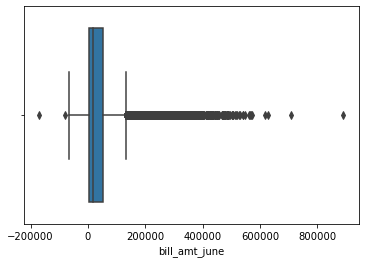

In [76]:
sns.boxplot(dataset['bill_amt_june'])

### Their are outlier in bill_amt_june.

<AxesSubplot:xlabel='default', ylabel='bill_amt_june'>

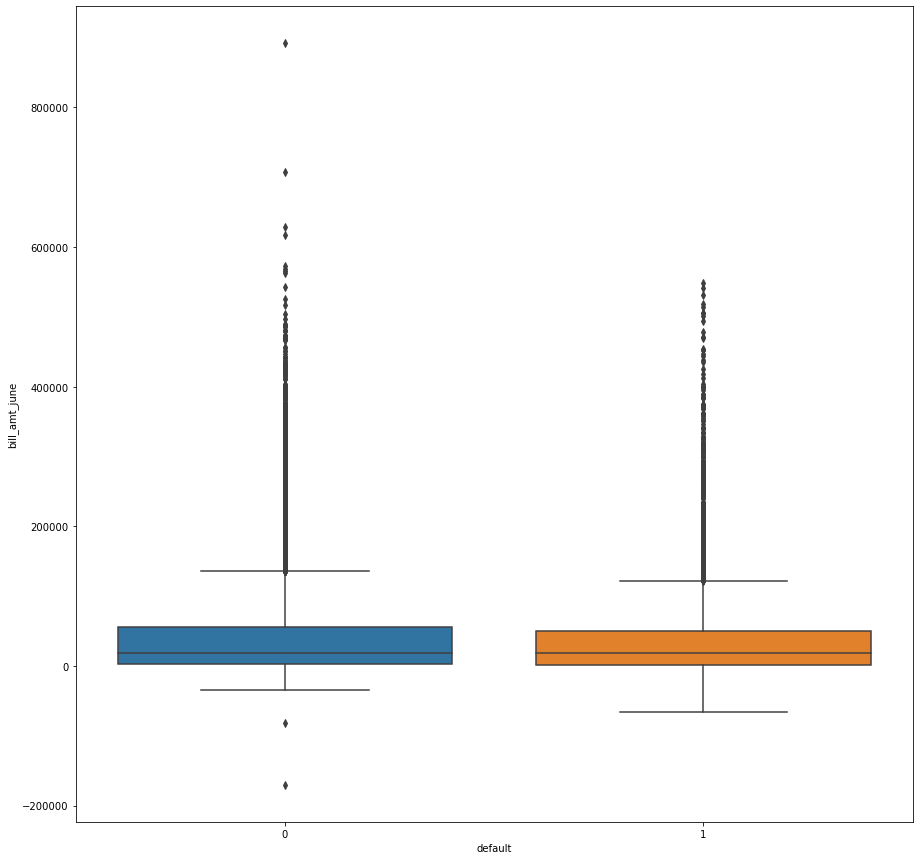

In [77]:
plt.figure(figsize = (15,15))
sns.boxplot(y=dataset['bill_amt_june'],x =dataset['default'])

### we see that not-default tend to have slight higher bill value.

In [78]:
dataset[['bill_amt_may']].head()

,bill_amt_may
0,0.0
1,3455.0
2,14948.0
3,28959.0
4,19146.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_amt_may'>

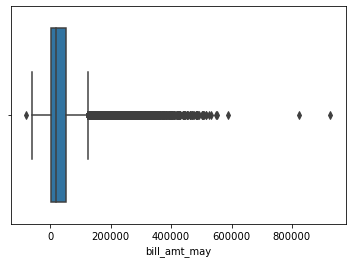

In [79]:
sns.boxplot(dataset['bill_amt_may'])

### Their are outlier in bill_amt_may.

<AxesSubplot:xlabel='default', ylabel='bill_amt_may'>

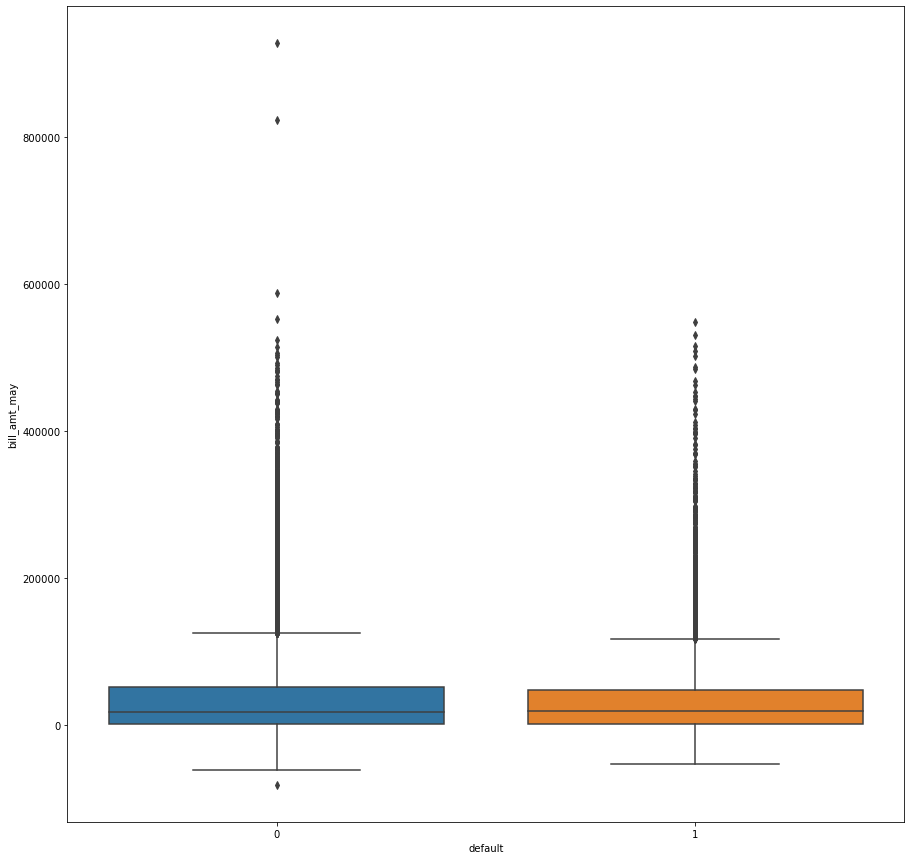

In [80]:
plt.figure(figsize = (15,15))
sns.boxplot(y=dataset['bill_amt_may'],x =dataset['default'])

### we see that not-default tend to have slight higher bill value.

In [81]:
dataset[['bill_amt_apr']].head()

,bill_amt_apr
0,0.0
1,3261.0
2,15549.0
3,29547.0
4,19131.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_amt_apr'>

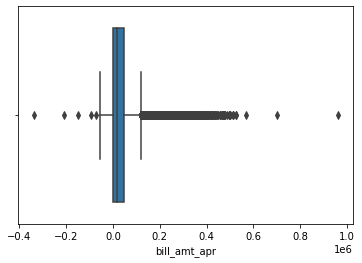

In [82]:
sns.boxplot(dataset['bill_amt_apr'])

### Their are outlier in bill_amt_apr.

<AxesSubplot:xlabel='default', ylabel='bill_amt_apr'>

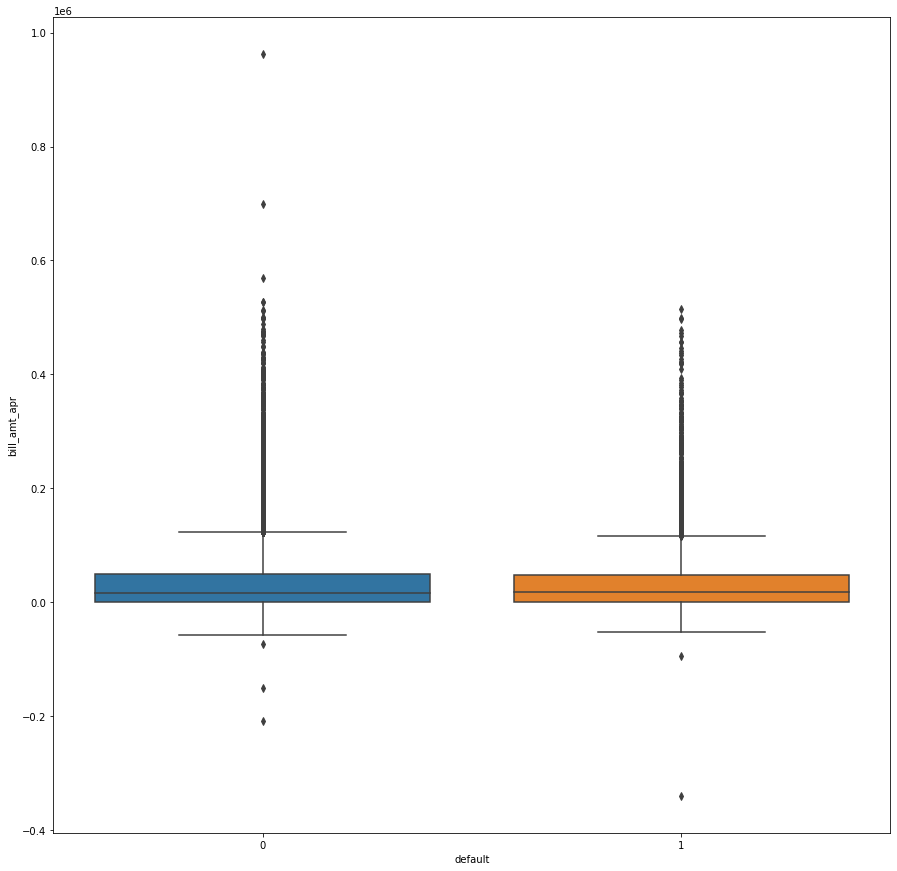

In [83]:
plt.figure(figsize = (15,15))
sns.boxplot(y=dataset['bill_amt_apr'],x =dataset['default'])

### we see that both default and not-default tend to have similar bill value.

In [84]:
dataset[['pay_amt_sep']].head()

,pay_amt_sep
0,0.0
1,0.0
2,1518.0
3,2000.0
4,2000.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_sep'>

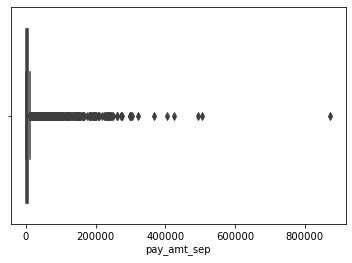

In [85]:
sns.boxplot(dataset['pay_amt_sep'])

### Their are outlier in pay_amt_sep.

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_sep', ylabel='default'>

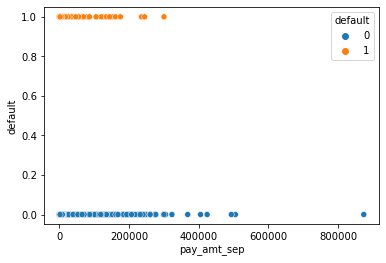

In [86]:
sns.scatterplot(dataset['pay_amt_sep'],dataset['default'],hue=dataset['default'])

### We see that not-default tend to have higher payment amount.

In [87]:
dataset[['pay_amt_aug']].head()

,pay_amt_aug
0,689.0
1,1000.0
2,1500.0
3,2019.0
4,36681.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_aug'>

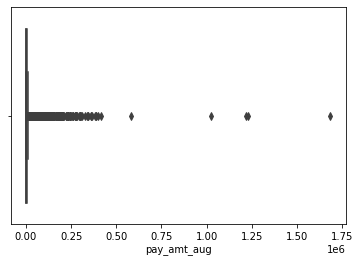

In [88]:
sns.boxplot(dataset['pay_amt_aug'])

### Their are outlier in pay_amt_aug

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_aug', ylabel='default'>

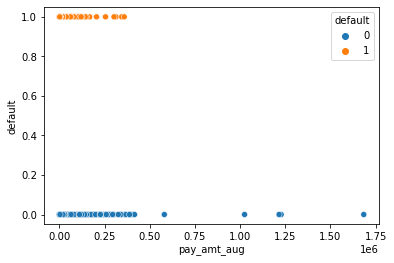

In [89]:
sns.scatterplot(dataset['pay_amt_aug'],dataset['default'],hue=dataset['default'])

### We see that not-default tend to have higher payment amount.

In [90]:
dataset[['pay_amt_july']].head()

,pay_amt_july
0,0.0
1,1000.0
2,1000.0
3,1200.0
4,10000.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_july'>

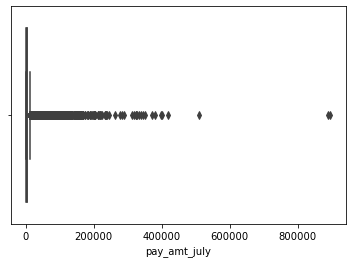

In [91]:
sns.boxplot(dataset['pay_amt_july'])

### Their are outlier in pay_amt_july

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_july', ylabel='default'>

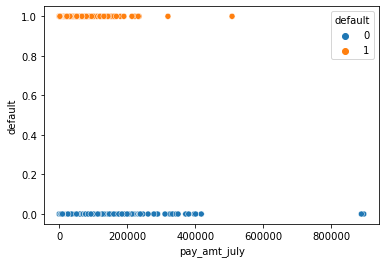

In [92]:
sns.scatterplot(dataset['pay_amt_july'],dataset['default'],hue=dataset['default'])

### We see that not-default tend to have higher payment amount.

In [93]:
dataset[['pay_amt_june']].head()

,pay_amt_june
0,0.0
1,1000.0
2,1000.0
3,1100.0
4,9000.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_june'>

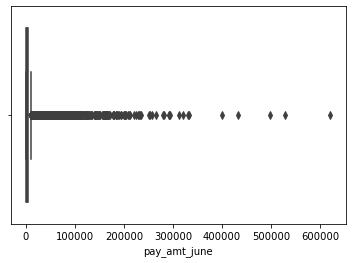

In [94]:
sns.boxplot(dataset['pay_amt_june'])

### Their are outlier in pay_amt_june

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_june', ylabel='default'>

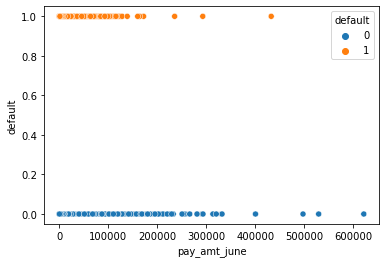

In [95]:
sns.scatterplot(dataset['pay_amt_june'],dataset['default'],hue=dataset['default'])

### We see that not-default tend to have higher payment amount.

In [96]:
dataset[['pay_amt_may']].head()

,pay_amt_may
0,0.0
1,0.0
2,1000.0
3,1069.0
4,689.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_may'>

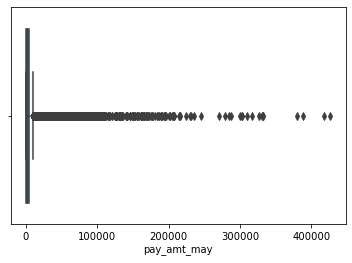

In [97]:
sns.boxplot(dataset['pay_amt_may'])

### Their are outlier in pay_amt_may.

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_may', ylabel='default'>

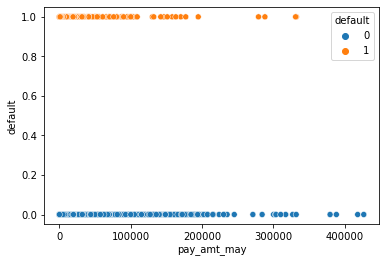

In [98]:
sns.scatterplot(dataset['pay_amt_may'],dataset['default'],hue=dataset['default'])

### We see that not-default tend to have higher payment amount.

In [99]:
dataset[['pay_amt_apr']].head()

,pay_amt_apr
0,0.0
1,2000.0
2,5000.0
3,1000.0
4,679.0


c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_apr'>

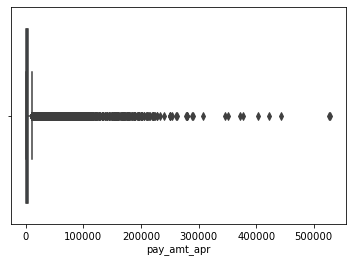

In [100]:
sns.boxplot(dataset['pay_amt_apr'])

### Their are outlier in pay_amt_apr.

c:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pay_amt_apr', ylabel='default'>

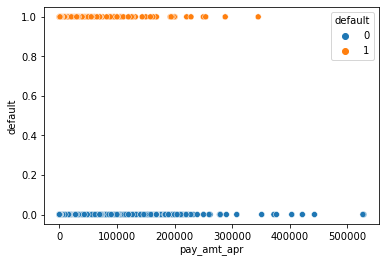

In [101]:
sns.scatterplot(dataset['pay_amt_apr'],dataset['default'],hue=dataset['default'])

### We see that not-default tend to have higher payment amount.

In [102]:
dataset.to_csv('D:/INEURON/ML/END TO END PROJECT/2 FEATURE ENGINEERING/CreditCardUpdated.csv',index=False)

In [104]:
dataset

,limit_bal,sex,education,marriage,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
